https://pub.towardsai.net/pandas-cut-vs-qcut-explained-clearly-finally-905847d473bd

In [1]:

# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

C:\Users\biegertm\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\biegertm\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Load sample data
planets = sns.load_dataset('planets', 
        usecols=['method', 'orbital_period', 
                'mass', 'distance']).dropna()
planets.head()

,method,orbital_period,mass,distance
0,Radial Velocity,269.300,7.10,77.40
1,Radial Velocity,874.774,2.21,56.95
2,Radial Velocity,763.000,2.60,19.84
3,Radial Velocity,326.030,19.40,110.62
4,Radial Velocity,516.220,10.50,119.47


In [3]:
planets.describe()

,orbital_period,mass,distance
count,498.000000,498.000000,498.000000
mean,835.778671,2.509320,52.068213
std,1469.128259,3.636274,46.596041
min,1.328300,0.003600,1.350000
25%,38.272250,0.212500,24.497500
50%,357.000000,1.245000,39.940000
75%,999.600000,2.867500,59.332500
max,17337.500000,25.000000,354.000000


In [4]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 784
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          498 non-null    object 
 1   orbital_period  498 non-null    float64
 2   mass            498 non-null    float64
 3   distance        498 non-null    float64
dtypes: float64(3), object(1)
memory usage: 19.5+ KB


To get the most out of this article and understand some of the language I will be using, here is a gentle refresher on interval notation:

(1, 10): not closed on either sides. Don’t include 1 and 10 in the interval
[1, 10): left closed interval. Include 1 but not 10
(1, 10]: right closed interval. Include 10 but not 1
[1, 10]: both sides closed. Include both 1 and 10

(array([353.,  68.,  30.,  21.,  10.,   7.,   3.,   4.,   1.,   1.]),
 array([3.600000e-03, 2.503240e+00, 5.002880e+00, 7.502520e+00,
        1.000216e+01, 1.250180e+01, 1.500144e+01, 1.750108e+01,
        2.000072e+01, 2.250036e+01, 2.500000e+01]),
 <BarContainer object of 10 artists>)

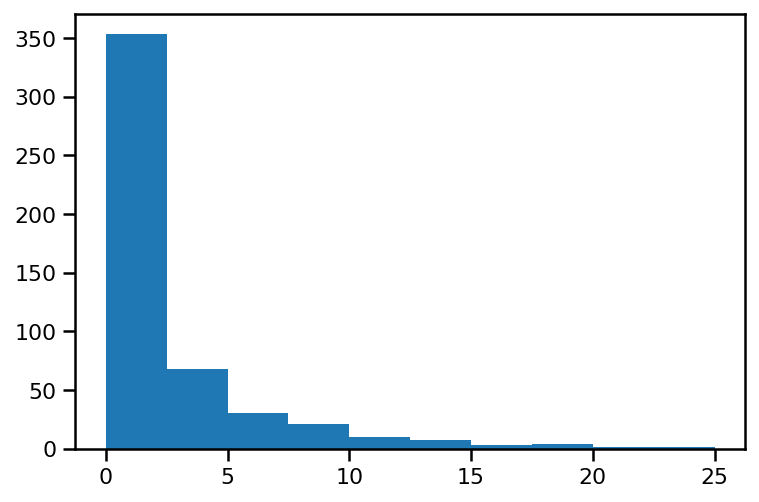

In [11]:

plt.hist(data=planets, x="mass")

In [12]:
pd.qcut(x=planets['distance'], q=4)

0                   (59.332, 354.0]
1                   (39.94, 59.332]
2      (1.3490000000000002, 24.498]
3                   (59.332, 354.0]
4                   (59.332, 354.0]
5                   (59.332, 354.0]
6      (1.3490000000000002, 24.498]
8                   (59.332, 354.0]
9                   (59.332, 354.0]
10                  (59.332, 354.0]
11                  (24.498, 39.94]
12                  (59.332, 354.0]
13     (1.3490000000000002, 24.498]
14     (1.3490000000000002, 24.498]
15     (1.3490000000000002, 24.498]
16     (1.3490000000000002, 24.498]
17     (1.3490000000000002, 24.498]
18     (1.3490000000000002, 24.498]
19     (1.3490000000000002, 24.498]
21     (1.3490000000000002, 24.498]
22     (1.3490000000000002, 24.498]
23     (1.3490000000000002, 24.498]
24     (1.3490000000000002, 24.498]
27                  (59.332, 354.0]
28                  (39.94, 59.332]
45     (1.3490000000000002, 24.498]
46     (1.3490000000000002, 24.498]
48     (1.3490000000000002, 

In [13]:
pd.qcut(x=planets['distance'], q=4)

0                   (59.332, 354.0]
1                   (39.94, 59.332]
2      (1.3490000000000002, 24.498]
3                   (59.332, 354.0]
4                   (59.332, 354.0]
5                   (59.332, 354.0]
6      (1.3490000000000002, 24.498]
8                   (59.332, 354.0]
9                   (59.332, 354.0]
10                  (59.332, 354.0]
11                  (24.498, 39.94]
12                  (59.332, 354.0]
13     (1.3490000000000002, 24.498]
14     (1.3490000000000002, 24.498]
15     (1.3490000000000002, 24.498]
16     (1.3490000000000002, 24.498]
17     (1.3490000000000002, 24.498]
18     (1.3490000000000002, 24.498]
19     (1.3490000000000002, 24.498]
21     (1.3490000000000002, 24.498]
22     (1.3490000000000002, 24.498]
23     (1.3490000000000002, 24.498]
24     (1.3490000000000002, 24.498]
27                  (59.332, 354.0]
28                  (39.94, 59.332]
45     (1.3490000000000002, 24.498]
46     (1.3490000000000002, 24.498]
48     (1.3490000000000002, 

In [14]:
planets['distance'].describe()

count    498.000000
mean      52.068213
std       46.596041
min        1.350000
25%       24.497500
50%       39.940000
75%       59.332500
max      354.000000
Name: distance, dtype: float64

In [15]:
planets['quantiles_4'] = pd.qcut(x=planets['distance'],
                                q=4, 
                                precision=0)
planets.sample(5)

,method,orbital_period,mass,distance,quantiles_4
313,Radial Velocity,51.76,0.0164,12.83,"(0.0, 24.0]"
254,Radial Velocity,465.10,14.3000,50.18,"(40.0, 59.0]"
589,Radial Velocity,442.10,1.2300,21.29,"(0.0, 24.0]"
533,Radial Velocity,1523.00,2.6000,44.05,"(40.0, 59.0]"
640,Radial Velocity,111.70,2.1000,14.90,"(0.0, 24.0]"


In [16]:
labels = ['near', 'medium', 'far', 'very_far']
planets['quantiles_4_labelled'] = pd.qcut(planets['distance'],
                                          q=4,
                                          labels=labels,
                                          precision=0)
planets.sample(5)

,method,orbital_period,mass,distance,quantiles_4,quantiles_4_labelled
549,Radial Velocity,956.000000,0.37,55.93,"(40.0, 59.0]",far
307,Radial Velocity,696.300000,10.70,99.40,"(59.0, 354.0]",very_far
6,Radial Velocity,1773.400000,4.64,18.15,"(0.0, 24.0]",near
377,Radial Velocity,2.985625,0.40,43.53,"(40.0, 59.0]",far
220,Radial Velocity,2496.000000,1.65,55.01,"(40.0, 59.0]",far


In [17]:
planets['quantiles_4_labelled'].value_counts()

quantiles_4_labelled
near        125
very_far    125
medium      124
far         124
Name: count, dtype: int64

In [20]:
# Get the bin edges with retbin
results, bins_edges = pd.qcut(planets['mass'], q=5, retbins=True)
# A numpy array with the edges of each interval
print(bins_edges)

[3.600e-03,7.940e-02,7.680e-01,1.800e+00,3.696e+00,2.500e+01]


def print_intervals(array):
    '''
    Simple function to print the width of
    each bin from the bin edges in the passed list.
    '''
    last = 0
    for index, edge in enumerate(array):
        if index == 0:
            last = edge
            continue
        print(f"Interval {index}:", round(edge - last, 3))
        last = edge
print_intervals(bins_edges)

[3.600e-03 7.940e-02 7.680e-01 1.800e+00 3.696e+00 2.500e+01]
Interval 1: 0.076
Interval 2: 0.689
Interval 3: 1.032
Interval 4: 1.896
Interval 5: 21.304


In [21]:
planets.drop(['quantiles_4', 'quantiles_4_labelled'],
             inplace=True,
             axis='columns')

In [22]:
pd.cut(planets['mass'], bins=3)

0      (-0.0214, 8.336]
1      (-0.0214, 8.336]
2      (-0.0214, 8.336]
3        (16.668, 25.0]
4       (8.336, 16.668]
5      (-0.0214, 8.336]
6      (-0.0214, 8.336]
8       (8.336, 16.668]
9      (-0.0214, 8.336]
10     (-0.0214, 8.336]
11      (8.336, 16.668]
12     (-0.0214, 8.336]
13     (-0.0214, 8.336]
14     (-0.0214, 8.336]
15     (-0.0214, 8.336]
16     (-0.0214, 8.336]
17     (-0.0214, 8.336]
18     (-0.0214, 8.336]
19     (-0.0214, 8.336]
21     (-0.0214, 8.336]
22     (-0.0214, 8.336]
23     (-0.0214, 8.336]
24     (-0.0214, 8.336]
27     (-0.0214, 8.336]
28     (-0.0214, 8.336]
45     (-0.0214, 8.336]
46     (-0.0214, 8.336]
48     (-0.0214, 8.336]
50     (-0.0214, 8.336]
51      (8.336, 16.668]
52     (-0.0214, 8.336]
55     (-0.0214, 8.336]
58     (-0.0214, 8.336]
61     (-0.0214, 8.336]
62     (-0.0214, 8.336]
63       (16.668, 25.0]
64     (-0.0214, 8.336]
65     (-0.0214, 8.336]
66     (-0.0214, 8.336]
67     (-0.0214, 8.336]
76     (-0.0214, 8.336]
79     (-0.0214,

In [24]:
planets['equally_binned'], bin_edges = pd.cut(
    planets['mass'], bins=3, precision=2,
    retbins=True)  # Save the bin edges for later

planets.sample(5)

,method,orbital_period,mass,distance,equally_binned
599,Radial Velocity,567.00000,0.330,43.53,"(-0.021, 8.34]"
424,Radial Velocity,48.05600,0.210,51.26,"(-0.021, 8.34]"
294,Radial Velocity,388.00000,9.100,20.98,"(8.34, 16.67]"
433,Radial Velocity,835.47700,11.090,97.66,"(8.34, 16.67]"
128,Radial Velocity,3.14942,0.006,6.27,"(-0.021, 8.34]"


In [25]:
planets['equally_binned'].value_counts()

equally_binned
(-0.021, 8.34]    459
(8.34, 16.67]      32
(16.67, 25.0]       7
Name: count, dtype: int64

In [26]:
print_intervals(bin_edges)

Interval 1: 8.357
Interval 2: 8.332
Interval 3: 8.332


In [27]:
ranges = [0, 5, 10, 20, np.inf]  # np.inf for infinity
labels = ['small', 'medium', 'massive', 'super_massive']
planets['mass_labelled'] = pd.cut(planets['mass'], 
                                  bins=ranges, 
                                  labels=labels)
planets.sample(5)

,method,orbital_period,mass,distance,equally_binned,mass_labelled
524,Radial Velocity,5144.000,3.530,42.99,"(-0.021, 8.34]",small
511,Radial Velocity,248.400,1.900,68.59,"(-0.021, 8.34]",small
61,Radial Velocity,39.845,1.040,17.43,"(-0.021, 8.34]",small
341,Radial Velocity,303.000,5.250,92.51,"(-0.021, 8.34]",medium
416,Radial Velocity,47.840,0.098,49.33,"(-0.021, 8.34]",small


In [28]:
ranges = np.linspace(0, 100, 5)
pd.cut(planets['distance'], bins=ranges)

0      (75.0, 100.0]
1       (50.0, 75.0]
2        (0.0, 25.0]
3                NaN
4                NaN
5      (75.0, 100.0]
6        (0.0, 25.0]
8       (50.0, 75.0]
9       (50.0, 75.0]
10      (50.0, 75.0]
11      (25.0, 50.0]
12     (75.0, 100.0]
13       (0.0, 25.0]
14       (0.0, 25.0]
15       (0.0, 25.0]
16       (0.0, 25.0]
17       (0.0, 25.0]
18       (0.0, 25.0]
19       (0.0, 25.0]
21       (0.0, 25.0]
22       (0.0, 25.0]
23       (0.0, 25.0]
24       (0.0, 25.0]
27     (75.0, 100.0]
28      (25.0, 50.0]
45       (0.0, 25.0]
46       (0.0, 25.0]
48       (0.0, 25.0]
50      (25.0, 50.0]
51      (25.0, 50.0]
52       (0.0, 25.0]
55      (50.0, 75.0]
58     (75.0, 100.0]
61       (0.0, 25.0]
62       (0.0, 25.0]
63     (75.0, 100.0]
64       (0.0, 25.0]
65       (0.0, 25.0]
66       (0.0, 25.0]
67       (0.0, 25.0]
76      (25.0, 50.0]
79      (25.0, 50.0]
80      (25.0, 50.0]
81       (0.0, 25.0]
82       (0.0, 25.0]
83      (50.0, 75.0]
84               NaN
114      (0.0

In [29]:

pd.interval_range(start=0, end=100, freq=10)

IntervalIndex([(0, 10], (10, 20], (20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80], (80, 90], (90, 100]], dtype='interval[int64, right]')

In [30]:
pd.interval_range(start=0, end=100, freq=10, closed='neither')

IntervalIndex([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)], dtype='interval[int64, neither]')

In [32]:
interval_range = pd.interval_range(start=0,
                                   end=20000,
                                   freq=2500,
                                   closed='right')
pd.cut(planets['orbital_period'], bins=interval_range)

0           (0, 2500]
1           (0, 2500]
2           (0, 2500]
3           (0, 2500]
4           (0, 2500]
5           (0, 2500]
6           (0, 2500]
8           (0, 2500]
9           (0, 2500]
10          (0, 2500]
11          (0, 2500]
12          (0, 2500]
13          (0, 2500]
14          (0, 2500]
15     (12500, 15000]
16          (0, 2500]
17          (0, 2500]
18          (0, 2500]
19       (2500, 5000]
21          (0, 2500]
22          (0, 2500]
23          (0, 2500]
24          (0, 2500]
27          (0, 2500]
28          (0, 2500]
45          (0, 2500]
46          (0, 2500]
48       (2500, 5000]
50          (0, 2500]
51          (0, 2500]
52          (0, 2500]
55          (0, 2500]
58          (0, 2500]
61          (0, 2500]
62          (0, 2500]
63          (0, 2500]
64          (0, 2500]
65          (0, 2500]
66          (0, 2500]
67       (2500, 5000]
76          (0, 2500]
79          (0, 2500]
80          (0, 2500]
81          (0, 2500]
82          (0, 2500]
83        